In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

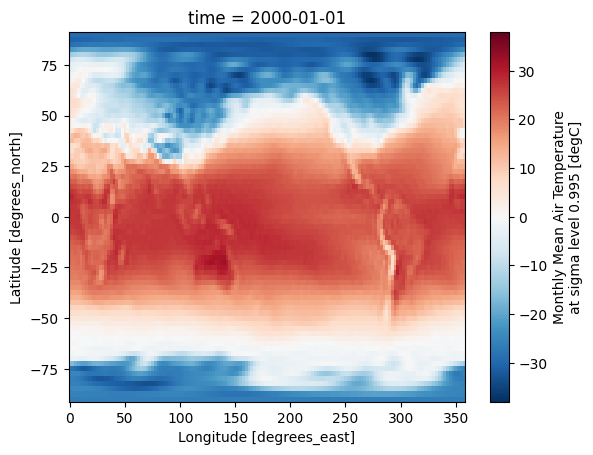

In [2]:
xdata = xr.open_dataset('AirTempData.nc')
xdata.sel(time='2000-01-01')['air'].plot()

In [3]:
Xregion = xdata.sel(lat=slice(6.,-6.), lon=slice(190.,240.)).mean(dim=['lat', 'lon'])
Yregion = xdata.sel(lat=slice(65.,50.), lon=slice(200.,240.)).mean(dim=['lat', 'lon'])

In [4]:
monthlymean = Xregion.groupby("time.month").mean("time")
anomalies_Xregion = Xregion.groupby("time.month") - monthlymean

Yregion_monthlymean = Yregion.groupby("time.month").mean("time")
anomalies_Yregion = Yregion.groupby("time.month") - Yregion_monthlymean

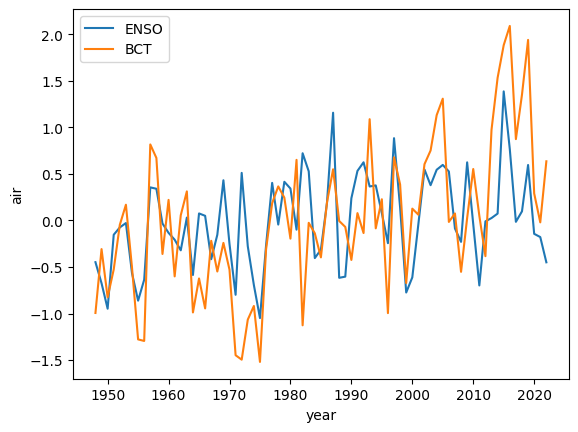

In [5]:
anomalies_Xregion.groupby("time.year").mean("time")['air'].plot(label='ENSO')
anomalies_Yregion.groupby("time.year").mean("time")['air'].plot(label='BCT')
plt.legend()

In [6]:
def is_ond(month):
    return (month >= 10) & (month <= 12)

def is_jfm(month):
    return (month >= 1) & (month <= 3)

def is_amj(month):
    return (month >= 4) & (month <= 6)

def is_jas(month):
    return ((month >= 7) & (month <= 9))

sel_months = [is_ond, is_jfm, is_amj, is_jas]

In [7]:
Xregion_by_quarter = [anomalies_Xregion.sel(time=f(xdata['time.month'])) for f in sel_months]

Xregion_quarters_by_year = [q.groupby("time.year").mean() for q in Xregion_by_quarter]

Yregion_by_quarter = [anomalies_Yregion.sel(time=f(xdata['time.month'])) for f in sel_months]

Yregion_quarters_by_year = [q.groupby("time.year").mean() for q in Yregion_by_quarter]

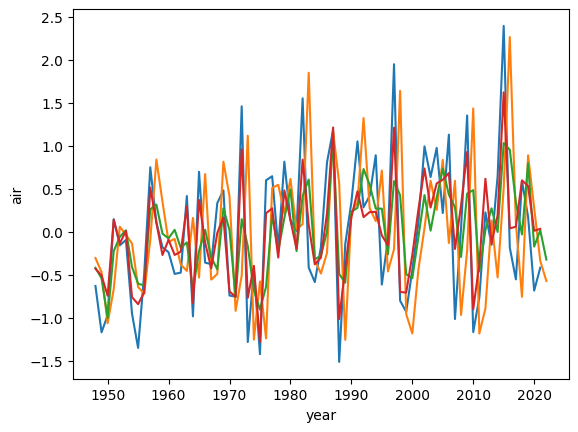

In [8]:
for q in Xregion_quarters_by_year:
    q['air'].plot()

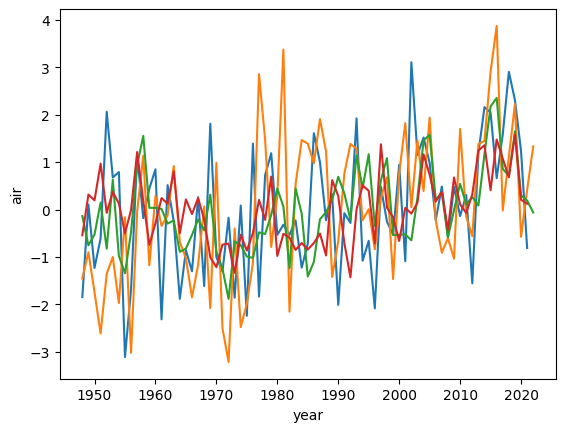

In [9]:
for q in Yregion_quarters_by_year:
    q['air'].plot()

In [10]:
X = np.hstack(list(map(lambda x: x['air'].to_numpy()[:74].reshape(-1, 1), Xregion_quarters_by_year)))
Y = np.hstack(list(map(lambda x: x['air'].to_numpy()[:74].reshape(-1, 1), Yregion_quarters_by_year)))

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)